### PROD MODELS
distil-whisper-large-v3-en, gemma2-9b-it, llama-3.3-70b-versatile, llama-3.1-8b-instant, llama-guard-3-8b, llama3-70b-8192, llama3-8b-8192
mixtral-8x7b-32768, whisper-large-v3,whisper-large-v3-turbo
### PREVIEW MODELS
deepseek-r1-distill-llama-70b, llama-3.3-70b-specdec, llama-3.2-1b-preview, llama-3.2-3b-preview, llama-3.2-11b-vision-preview, llama-3.2-90b-vision-preview

In [11]:

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [12]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just an AI, so I don't have feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 16, 'total_tokens': 64, 'completion_time': 0.04, 'prompt_time': 0.005650789, 'queue_time': 0.08358908599999999, 'total_time': 0.045650789}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-8a0e45b5-8e23-47b0-a3de-8f4152f1efe2-0', usage_metadata={'input_tokens': 16, 'output_tokens': 48, 'total_tokens': 64})

In [13]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]



In [14]:

graph_builder = StateGraph(State)

In [15]:

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


In [16]:


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

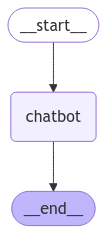

In [17]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [18]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


In [19]:

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: QPE can refer to several things, depending on the context:

1. **Quantitative Precipitation Estimation**: In meteorology and hydrology, QPE is a technique used to estimate the amount of precipitation (rain, snow, sleet, hail, etc.) that has fallen or is falling at a specific location. QPE is often used to provide accurate and timely information for flood forecasting, water resource management, and other applications.
2. **Quantum Process Error**: In quantum computing, QPE is a method used to correct errors that occur during the execution of quantum algorithms. QPE is a crucial component of quantum error correction, as it allows quantum computers to maintain the fragile quantum states required for processing complex calculations.
3. **Quality Policy and Excellence**: In the context of quality management, QPE is a framework or system that helps organizations achieve excellence in their products, services, or processes. QPE encompasses various aspects, including quality plannin